# 1. Load Needed Packages

In [ ]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="white", palette="pastel")

import warnings
warnings.filterwarnings('ignore')

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# 2. Get Data

In [42]:
df = pd.read_excel('Final Assignment - Week 9.xlsx')
df.head(2)

,id,logtarg,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,...,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99,Unnamed: 66,Unnamed: 67,"Dear Greg,"
0,914,NaN,194,7,318.894775,1703,1,0,1,0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,NaN,NaN,NaN
1,957,NaN,3,14,368.052246,2364,1,0,2,0,...,0.0,0.0,61.176025,17.150269,10.0,0.0,0.0,NaN,NaN,I wanted to find something that the students c...


In [43]:
df = df.loc[:,:'Mnonbooks99']
df.head(2)

,id,logtarg,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,...,Mhealth35,Mcooking36,Mlearning37,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99
0,914,NaN,194,7,318.894775,1703,1,0,1,0,...,14.899994,10.174706,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,957,NaN,3,14,368.052246,2364,1,0,2,0,...,74.156250,0.000000,22.749985,0.0,0.0,61.176025,17.150269,10.0,0.0,0.0


In [44]:
# Check the structure or type of each variable
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33713 entries, 0 to 33712
Data columns (total 66 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                33713 non-null  int64  
 1   logtarg           8311 non-null   float64
 2   r                 33713 non-null  int64  
 3   f                 33713 non-null  int64  
 4   m                 33713 non-null  float64
 5   tof               33713 non-null  int64  
 6   Ffiction1         33713 non-null  int64  
 7   Fclassics3        33713 non-null  int64  
 8   Fcartoons5        33713 non-null  int64  
 9   Flegends6         33713 non-null  int64  
 10  Fphilosophy7      33713 non-null  int64  
 11  Freligion8        33713 non-null  int64  
 12  Fpsychology9      33713 non-null  int64  
 13  Flinguistics10    33713 non-null  int64  
 14  Fart12            33713 non-null  int64  
 15  Fmusic14          33713 non-null  int64  
 16  Ffacsimile17      33713 non-null  int64 

In [45]:
# Remove logtarg since most rows are null
df.drop(columns=['logtarg'], inplace=True)

In [46]:
#Find unique values in each column
df.nunique()

id                  33713
r                    1750
f                      86
m                   24161
tof                  1754
                    ...  
Mhobby40             2744
Mnature41            1381
Mencyclopaedia44     2174
Mvideos50            1438
Mnonbooks99           516
Length: 65, dtype: int64

In [47]:
# All IDs are unique, so the id variable can be removed
df.drop(columns=['id'], inplace=True)

In [48]:
# Perform descriptive statistics on all variables to understand the data
df.describe().round(2)

,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,Freligion8,...,Mhealth35,Mcooking36,Mlearning37,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99
count,33713.00,33713.00,33713.00,33713.00,33713.00,33713.00,33713.00,33713.00,33713.00,33713.00,...,33713.00,33713.00,33713.00,33713.00,33713.00,33713.00,33713.00,33713.00,33713.00,33713.00
mean,508.43,5.82,251.92,1296.09,0.59,0.23,0.36,0.10,0.29,0.98,...,29.10,4.22,21.15,0.31,0.02,6.79,3.73,8.40,6.02,1.80
std,542.44,7.01,3929.93,818.98,1.76,0.87,1.11,0.53,1.09,3.11,...,2087.22,19.98,2898.45,1.99,0.50,21.20,15.01,46.02,19.64,21.38
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,117.00,1.00,39.90,536.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,293.00,3.00,102.63,1311.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,712.00,7.00,247.30,2132.00,1.00,0.00,0.00,0.00,0.00,1.00,...,18.90,0.00,2.50,0.00,0.00,5.11,0.00,0.00,0.00,0.00
max,2460.00,118.00,532892.00,2462.00,109.00,29.00,49.00,22.00,35.00,134.00,...,383154.50,820.56,532182.00,78.72,21.45,771.61,735.35,1999.15,794.14,2412.96


# 3. Visualize Data

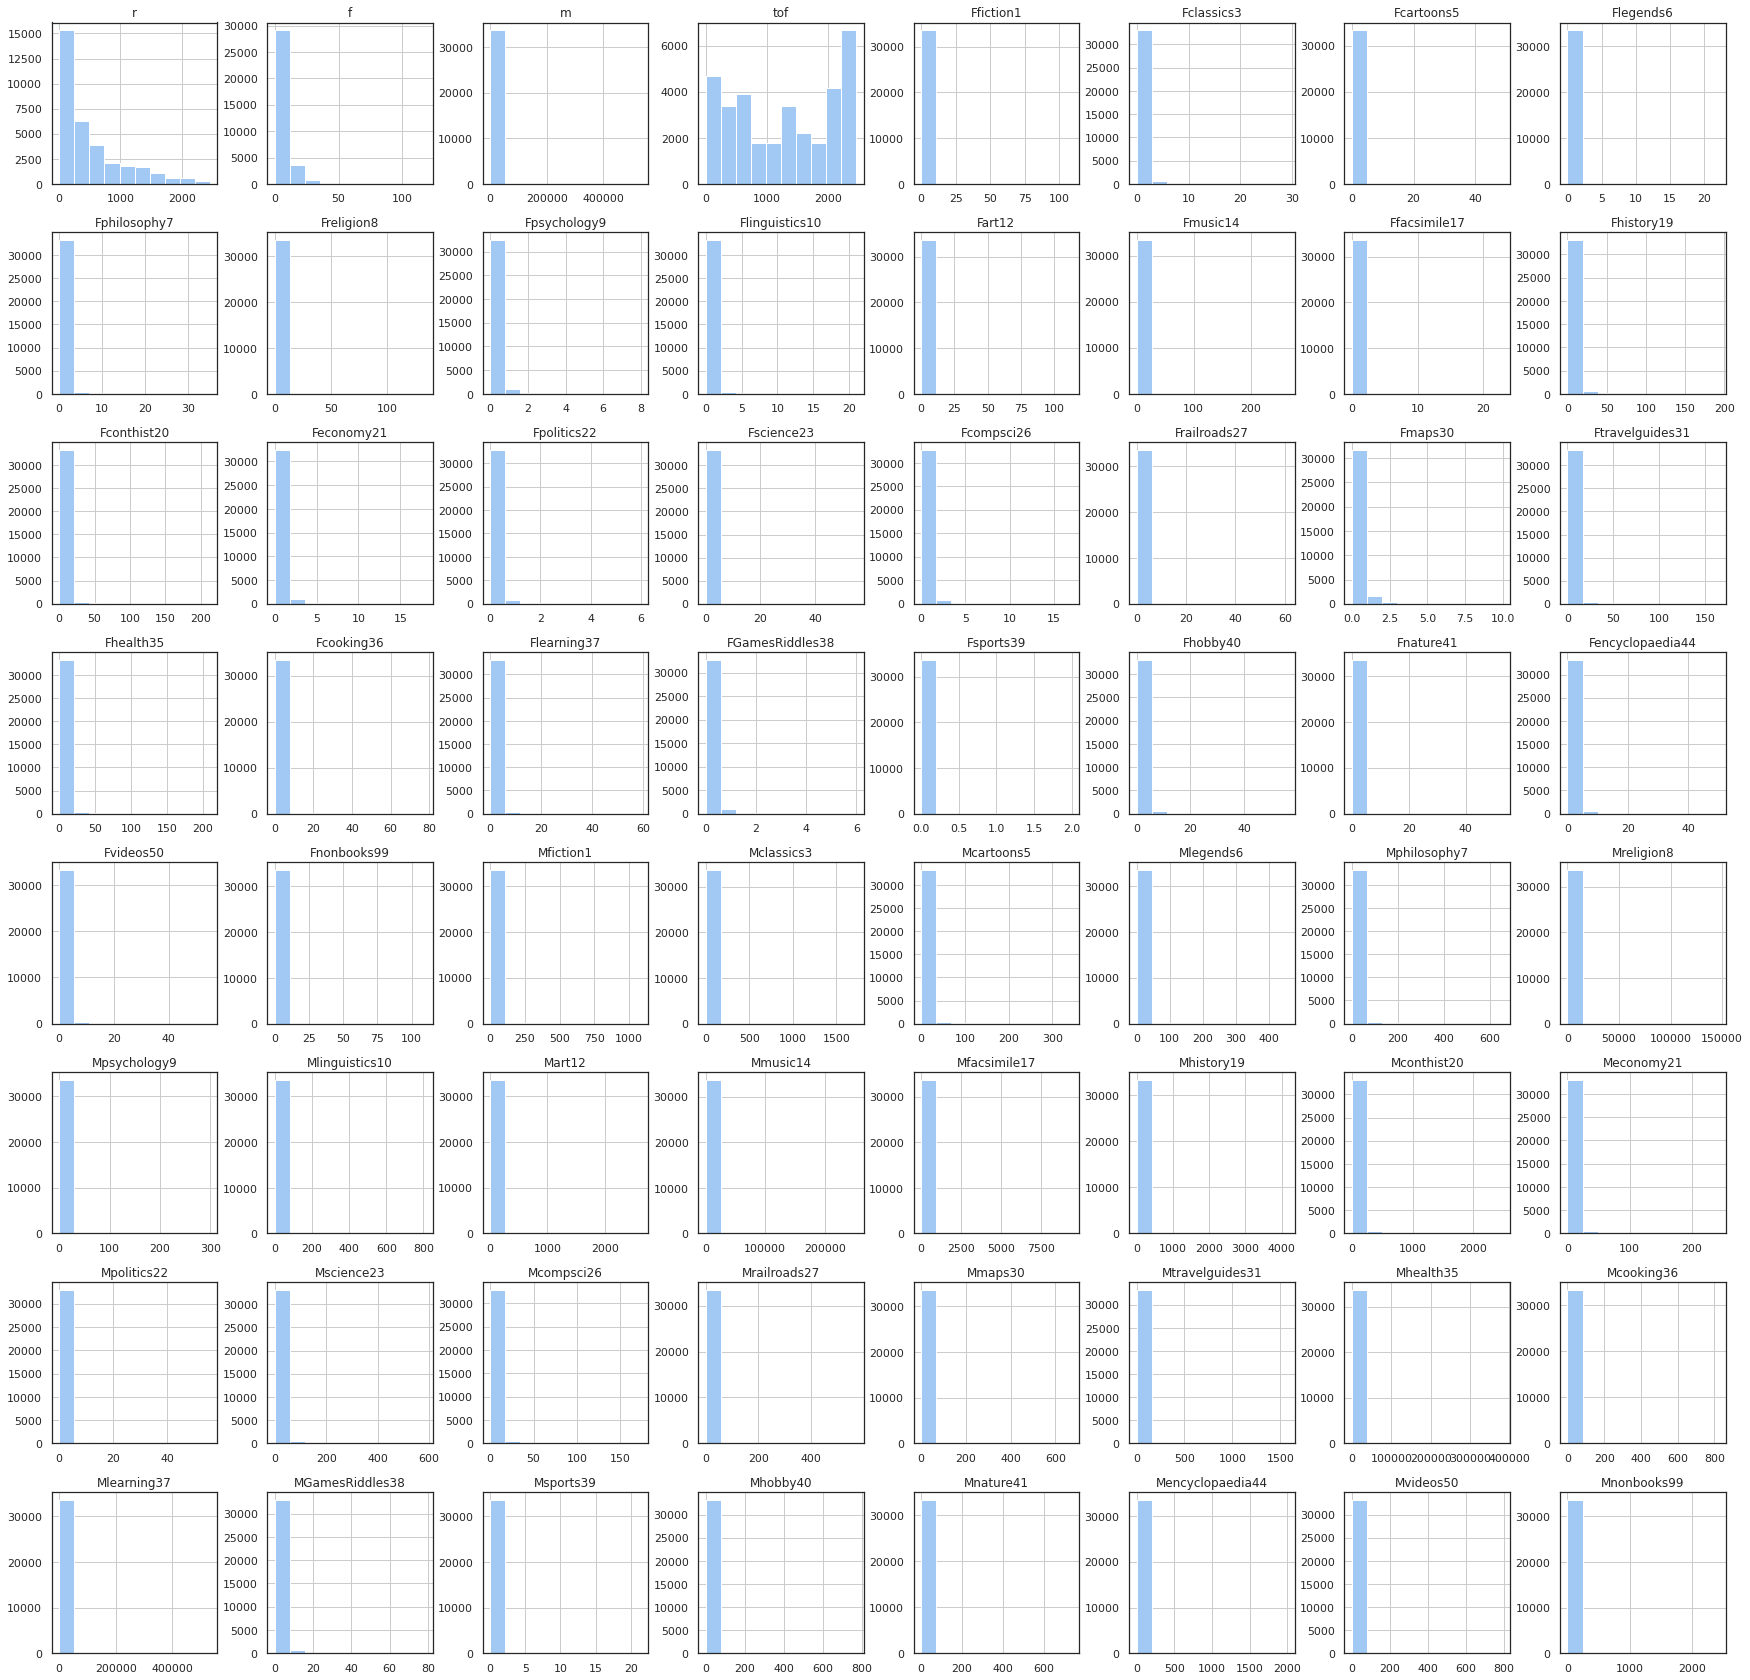

In [49]:
# Plot the histogram of all variables
fig = plt.figure(figsize=(30,30));
ax = fig.gca() 
df.hist(ax=ax)
pass

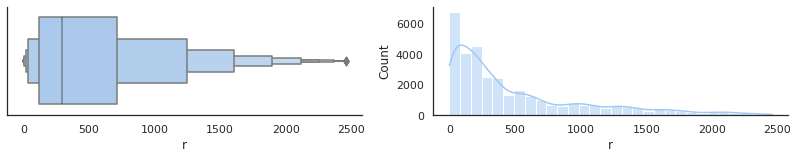

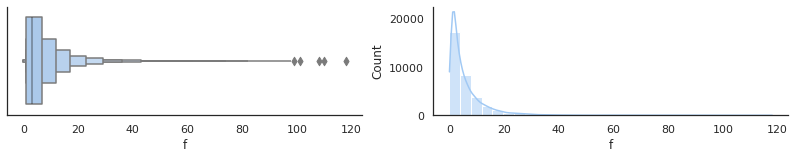

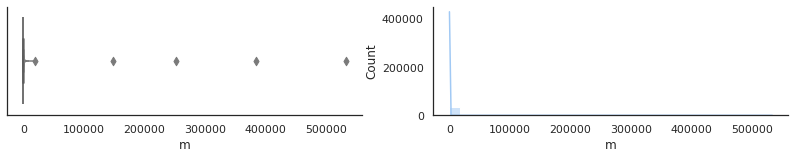

In [50]:
# Visualize RFM metrics
for col in ['r','f','m']:
    f, axs = plt.subplots(ncols=2, figsize=(14, 2))
    sns.despine(f)
    
    sns.boxenplot(x=df[col],ax=axs[0])
    sns.histplot(x=df[col], bins=30, kde=True, ax=axs[1])
    
    plt.show()

In [51]:
# Get rid of outliers
df = df[df['m'] < df['m'].quantile(0.95)]
df.reset_index(drop=True, inplace=True)

In [52]:
# Perform descriptive statistics on all variables to understand the data
df.describe().round(2)

,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,Freligion8,...,Mhealth35,Mcooking36,Mlearning37,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99
count,32027.00,32027.00,32027.00,32027.00,32027.00,32027.00,32027.00,32027.00,32027.00,32027.0,...,32027.00,32027.00,32027.00,32027.00,32027.00,32027.00,32027.00,32027.00,32027.00,32027.00
mean,522.67,4.91,153.81,1255.70,0.44,0.16,0.28,0.08,0.21,0.7,...,14.12,3.15,4.25,0.25,0.02,4.96,2.75,5.48,5.34,1.22
std,548.28,5.00,160.45,812.85,1.10,0.58,0.80,0.40,0.72,1.8,...,30.26,14.03,13.17,1.72,0.44,13.57,10.10,19.85,16.62,9.85
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,128.00,1.00,37.80,479.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,311.00,3.00,95.99,1287.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,746.00,7.00,214.10,2077.00,0.00,0.00,0.00,0.00,0.00,1.0,...,16.85,0.00,0.00,0.00,0.00,3.95,0.00,0.00,0.00,0.00
max,2460.00,101.00,759.17,2462.00,21.00,13.00,19.00,13.00,24.00,49.0,...,504.85,565.18,392.13,54.52,18.41,214.03,304.73,611.50,369.15,469.67


# 4. Set Up Quartiles

In [53]:
# Create a new dataframe
rfm_df = df[['r','f','m']]

# Rename the new RFM dataframe
rfm_df.rename(columns={'r': 'recency', 
                       'f': 'frequency',
                       'm': 'monetary'}, inplace=True)
rfm_df.head()

,recency,frequency,monetary
0,194,7,318.894775
1,3,14,368.052246
2,1489,15,423.298340
3,155,4,71.217041
4,194,6,442.638184


In [54]:
# The RFM tiers will be determined by quartiles, so we should first view the threshold for each quartiles.
quartile = rfm_df.quantile(q=[0.25,0.50,0.75])
quartile

,recency,frequency,monetary
0.25,128.0,1.0,37.799988
0.50,311.0,3.0,95.994934
0.75,746.0,7.0,214.099243


In [60]:
# The RFM tiers will be determined by quartiles, so we should first view the threshold for each quartiles.
quartile = rfm_df.quantile(q=[0.33,0.67])
quartile

,recency,frequency,monetary
0.33,177.0,2.0,51.988752
0.67,559.0,5.0,162.876665


In [55]:
# Scale customers from 1 to 4, where 4 is the lowest and 1 is the highest
# Recency quartiles - less recency, better score
rfm_df['r_quartile']= pd.qcut(rfm_df['recency'], q = 4, labels = [1,2,3,4])

# Frequency quartiles - more frequency, better score
rfm_df['f_quartile']= pd.qcut(rfm_df['frequency'], q = 4, labels = [4,3,2,1])

# Monetary quartiles - more monetary, better score
rfm_df['m_quartile']= pd.qcut(rfm_df['monetary'], q = 4, labels = [4,3,2,1])

rfm_df.head(2)

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
0,194,7,318.894775,2,2,1
1,3,14,368.052246,1,1,1


In [56]:
# Check the data type of each variable
rfm_df.dtypes

recency          int64
frequency        int64
monetary       float64
r_quartile    category
f_quartile    category
m_quartile    category
dtype: object

# 1, 2 Recency

In [57]:
r_12_df = rfm_df[rfm_df['r_quartile']<=3].reset_index(drop=True)
r_12_df.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
0,194,7,318.894775,2,2,1
1,3,14,368.052246,1,1,1
2,155,4,71.217041,2,2,3
3,194,6,442.638184,2,2,1
4,383,3,52.399658,3,3,3


In [58]:
# Convert category data to string type
r_12_df[['f_quartile','m_quartile']] = r_12_df[['f_quartile','m_quartile']].astype(str)

# Concatenate the R, F, and M quartiles to get a RFM score
r_12_df['FM'] = r_12_df['f_quartile'] + r_12_df['m_quartile']

r_12_df.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,FM
0,194,7,318.894775,2,2,1,21
1,3,14,368.052246,1,1,1,11
2,155,4,71.217041,2,2,3,23
3,194,6,442.638184,2,2,1,21
4,383,3,52.399658,3,3,3,33


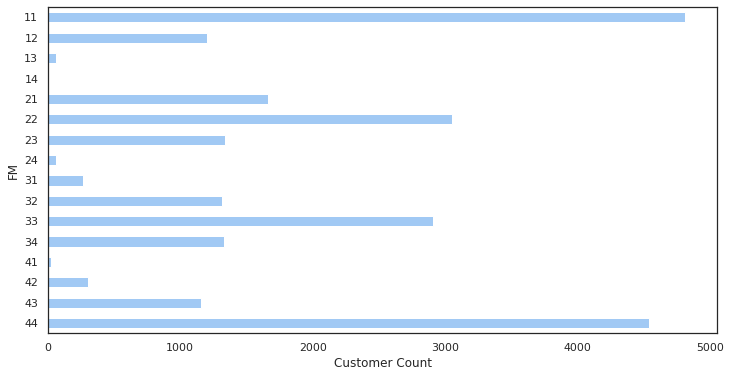

In [59]:
# Visualize customer numbers by RFM score
plt.figure(figsize=(12,6))

r_12_df['FM'].value_counts().sort_index(ascending=False).plot(kind='barh')

# Format plots
plt.xlabel('Customer Count')
plt.ylabel('FM')

plt.show()

# 4. Deal with Category

In [ ]:
df.head()

,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,Freligion8,...,Mhealth35,Mcooking36,Mlearning37,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99
0,194,7,318.894775,1703,1,0,1,0,0,0,...,14.899994,10.174706,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,3,14,368.052246,2364,1,0,2,0,0,0,...,74.156250,0.000000,22.749985,0.0,0.0,61.176025,17.150269,10.0,0.000000,0.0
2,1489,15,423.298340,2371,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,155,4,71.217041,1290,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,194,6,442.638184,2188,0,0,1,0,3,1,...,41.518219,0.000000,7.949997,0.0,0.0,17.895203,0.000000,0.0,61.799988,0.0


In [ ]:
# get the target data
df_category = df.iloc[:,34:]
df_category.head()

,Mfiction1,Mclassics3,Mcartoons5,Mlegends6,Mphilosophy7,Mreligion8,Mpsychology9,Mlinguistics10,Mart12,Mmusic14,...,Mhealth35,Mcooking36,Mlearning37,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99
0,5.949997,0.0,7.643810,0.0,0.00000,0.000000,0.0,0.000000,8.589699,61.429962,...,14.899994,10.174706,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,12.680038,0.0,20.236496,0.0,0.00000,0.000000,0.0,0.000000,0.000000,29.414169,...,74.156250,0.000000,22.749985,0.0,0.0,61.176025,17.150269,10.0,0.000000,0.0
2,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,0.000000,0.0,8.899994,0.0,26.19841,19.899994,0.0,6.621227,15.313187,39.804047,...,41.518219,0.000000,7.949997,0.0,0.0,17.895203,0.000000,0.0,61.799988,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(df['Mhistory19'].values.reshape(1, -1), df['Mart12'].values.reshape(1, -1))

array([[0.31423783]])

# 5. K Means

In [ ]:
# Generate a new dataset for clustering
cluster_df = df.copy()

# Check the data type of each variable
cluster_df.dtypes

r                     int64
f                     int64
m                   float64
tof                   int64
Ffiction1             int64
                     ...   
Mhobby40            float64
Mnature41           float64
Mencyclopaedia44    float64
Mvideos50           float64
Mnonbooks99         float64
Length: 64, dtype: object

In [ ]:
cluster_df.columns

Index(['r', 'f', 'm', 'tof', 'Ffiction1', 'Fclassics3', 'Fcartoons5',
       'Flegends6', 'Fphilosophy7', 'Freligion8', 'Fpsychology9',
       'Flinguistics10', 'Fart12', 'Fmusic14', 'Ffacsimile17', 'Fhistory19',
       'Fconthist20', 'Feconomy21', 'Fpolitics22', 'Fscience23', 'Fcompsci26',
       'Frailroads27', 'Fmaps30', 'Ftravelguides31', 'Fhealth35', 'Fcooking36',
       'Flearning37', 'FGamesRiddles38', 'Fsports39', 'Fhobby40', 'Fnature41',
       'Fencyclopaedia44', 'Fvideos50', 'Fnonbooks99', 'Mfiction1',
       'Mclassics3', 'Mcartoons5', 'Mlegends6', 'Mphilosophy7', 'Mreligion8',
       'Mpsychology9', 'Mlinguistics10', 'Mart12', 'Mmusic14', 'Mfacsimile17',
       'Mhistory19', 'Mconthist20', 'Meconomy21', 'Mpolitics22', 'Mscience23',
       'Mcompsci26', 'Mrailroads27', 'Mmaps30', 'Mtravelguides31', 'Mhealth35',
       'Mcooking36', 'Mlearning37', 'MGamesRiddles38', 'Msports39', 'Mhobby40',
       'Mnature41', 'Mencyclopaedia44', 'Mvideos50', 'Mnonbooks99'],
      dtype='obj

In [ ]:
cluster_df[['Ffiction1', 'Fclassics3', 'Fcartoons5',
       'Flegends6', 'Fphilosophy7', 'Freligion8', 'Fpsychology9',
       'Flinguistics10', 'Fart12', 'Fmusic14', 'Ffacsimile17', 'Fhistory19',
       'Fconthist20', 'Feconomy21', 'Fpolitics22', 'Fscience23', 'Fcompsci26',
       'Frailroads27', 'Fmaps30', 'Ftravelguides31', 'Fhealth35', 'Fcooking36',
       'Flearning37', 'FGamesRiddles38', 'Fsports39', 'Fhobby40', 'Fnature41',
       'Fencyclopaedia44', 'Fvideos50', 'Fnonbooks99']] = \
       cluster_df[['Ffiction1', 'Fclassics3', 'Fcartoons5',
       'Flegends6', 'Fphilosophy7', 'Freligion8', 'Fpsychology9',
       'Flinguistics10', 'Fart12', 'Fmusic14', 'Ffacsimile17', 'Fhistory19',
       'Fconthist20', 'Feconomy21', 'Fpolitics22', 'Fscience23', 'Fcompsci26',
       'Frailroads27', 'Fmaps30', 'Ftravelguides31', 'Fhealth35', 'Fcooking36',
       'Flearning37', 'FGamesRiddles38', 'Fsports39', 'Fhobby40', 'Fnature41',
       'Fencyclopaedia44', 'Fvideos50', 'Fnonbooks99']].astype(int)

In [ ]:
cluster_df[['Mfiction1',
       'Mclassics3', 'Mcartoons5', 'Mlegends6', 'Mphilosophy7', 'Mreligion8',
       'Mpsychology9', 'Mlinguistics10', 'Mart12', 'Mmusic14', 'Mfacsimile17',
       'Mhistory19', 'Mconthist20', 'Meconomy21', 'Mpolitics22', 'Mscience23',
       'Mcompsci26', 'Mrailroads27', 'Mmaps30', 'Mtravelguides31', 'Mhealth35',
       'Mcooking36', 'Mlearning37', 'MGamesRiddles38', 'Msports39', 'Mhobby40',
       'Mnature41', 'Mencyclopaedia44', 'Mvideos50', 'Mnonbooks99']] = \
       cluster_df[['Mfiction1',
       'Mclassics3', 'Mcartoons5', 'Mlegends6', 'Mphilosophy7', 'Mreligion8',
       'Mpsychology9', 'Mlinguistics10', 'Mart12', 'Mmusic14', 'Mfacsimile17',
       'Mhistory19', 'Mconthist20', 'Meconomy21', 'Mpolitics22', 'Mscience23',
       'Mcompsci26', 'Mrailroads27', 'Mmaps30', 'Mtravelguides31', 'Mhealth35',
       'Mcooking36', 'Mlearning37', 'MGamesRiddles38', 'Msports39', 'Mhobby40',
       'Mnature41', 'Mencyclopaedia44', 'Mvideos50', 'Mnonbooks99']].astype(float)

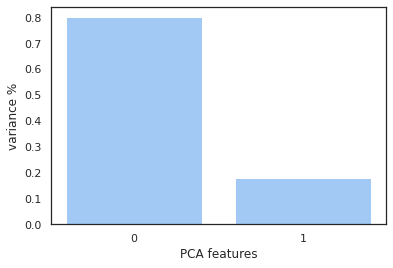

In [ ]:
# Use PCA to get the few principal components and ignoring the rest
pca = PCA(n_components=0.95)
principalComponents = pca.fit_transform(cluster_df)

features = range(pca.n_components_)

plt.figure(figsize=(6,4))
plt.bar(features, pca.explained_variance_ratio_)

plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

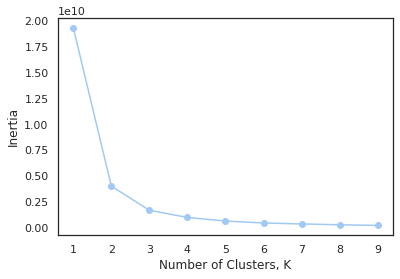

In [ ]:
# From the above chart, the first PCA components explain more than 80% of the variance in the dataset
# Rebuild the model with the first components
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:1])
    inertias.append(model.inertia_)

plt.figure(figsize=(6,4))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of Clusters, K')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [ ]:
# Build a model with 6 clusters
model = KMeans(n_clusters=6)
model.fit(PCA_components.iloc[:,:1])

# Silhouette score - higher, better
print(silhouette_score(PCA_components.iloc[:,:1], model.labels_, metric='euclidean'))

0.5801465039732564


In [ ]:
# Put cluster results into the dataframe
clusters = model.fit_predict(PCA_components.iloc[:,:1])
cluster_df['Cluster'] = clusters

In [ ]:
cluster_df.head(2)

,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,Freligion8,...,Mcooking36,Mlearning37,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99,Cluster
0,194,7,318.894775,1703,1,0,1,0,0,0,...,10.174706,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,2
1,3,14,368.052246,2364,1,0,2,0,0,0,...,0.000000,22.749985,0.0,0.0,61.176025,17.150269,10.0,0.0,0.0,3


In [ ]:
cluster_df['Cluster'].value_counts()

4    7546
0    4934
3    4455
1    4115
2    3936
5    3759
Name: Cluster, dtype: int64